<a href="https://colab.research.google.com/github/Kevinlodaya/Optimization-and-Gradient-Descent-in-California-Housing-Price-Analysis/blob/main/Optimization_and_Gradient_Descent_in_California_Housing_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Imported data from DB.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
#tqdm is used to create a smart progress bar for the loops
import random

In [8]:
a=np.array([[1,2,3],[4,5,6]])
print(a[1,2])

6


In [11]:
# Import the dataset as dataframe using read_csv() method of pandas package
data=pd.read_csv("California_housing.csv")

In [20]:
#Exploratory Data Analysis & Show the top 5 and the last 5 rows of the data using head() method
print(data.shape)
print("-------------------------------------------------")
print(data.head()) # defaults to 5
print("-------------------------------------------------")
print(data.tail()) # defaults to 5
print("-------------------------------------------------")
print(data.describe())
print("-------------------------------------------------")
data['MedInc'].info()
data.info()

(20640, 9)
-------------------------------------------------
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Housing_Value  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  
-------------------------------------------------
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.700

In [21]:
data.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
Housing_Value    0
dtype: int64

In [22]:
# DATA VISUALIZATION

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Longitude', ylabel='Latitude'>

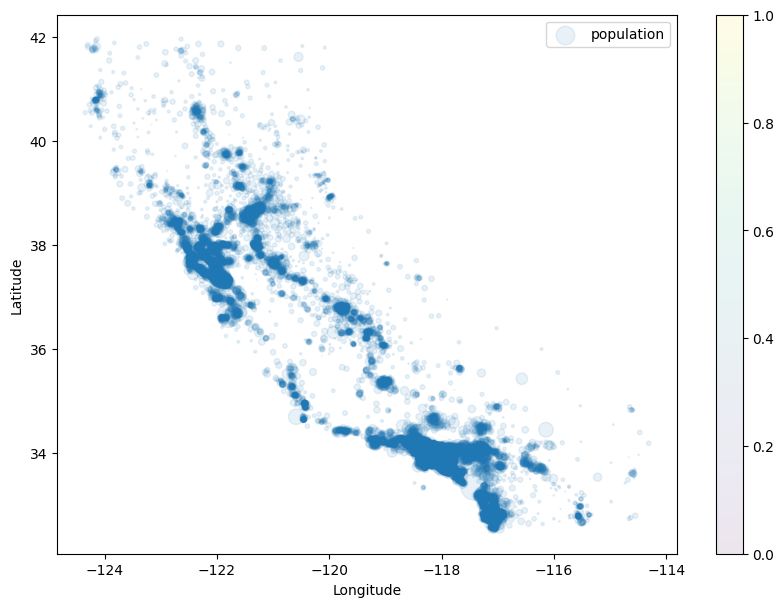

In [24]:
#Visualize the Latitude and Longitude using the Population as size using plot() method and experiment with various parameters of that method
data.plot(kind="scatter", x="Longitude", y="Latitude",
    s=data['Population']/100, label="population",cmap=plt.get_cmap("Reds"),
      colorbar=True, alpha=0.1, figsize=(10,7))

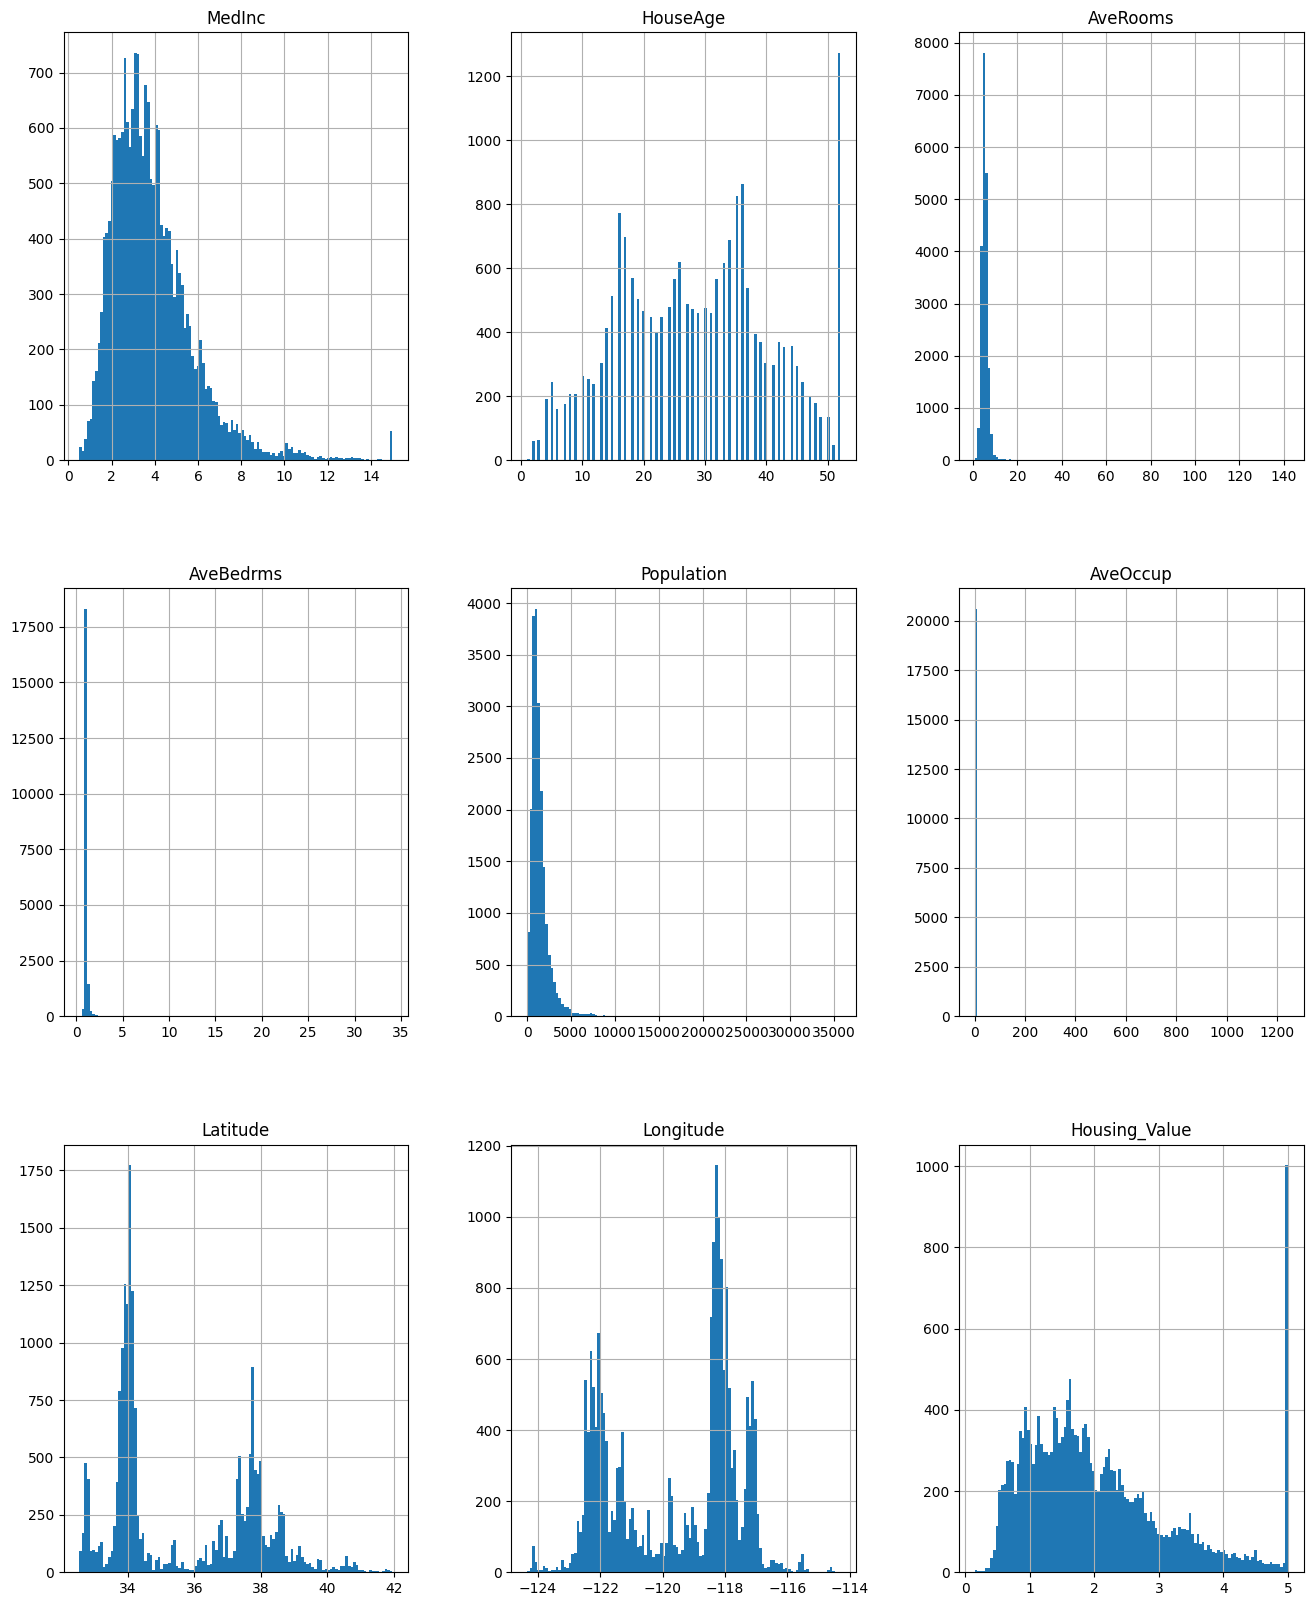

In [28]:
data.hist(bins=120 , figsize=(16,20))
plt.show()

<Axes: >

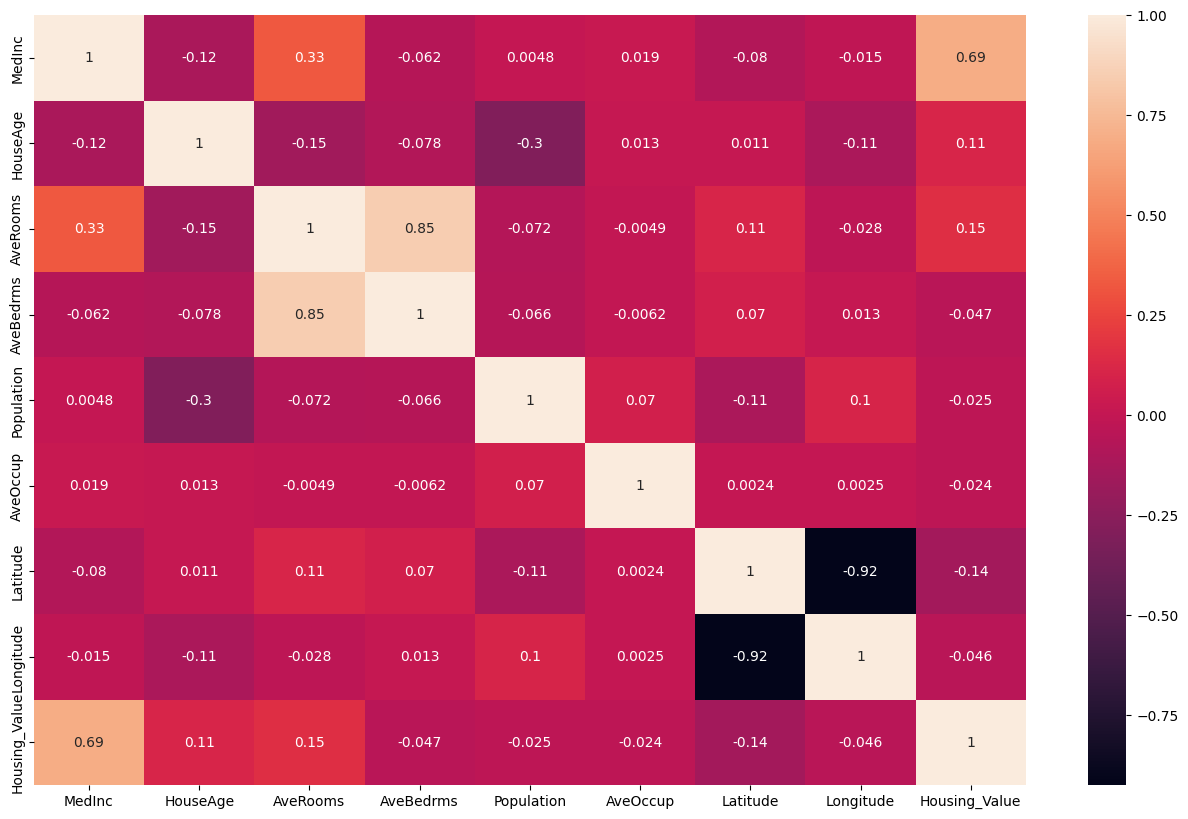

In [29]:
#Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), cbar = True , annot=True)

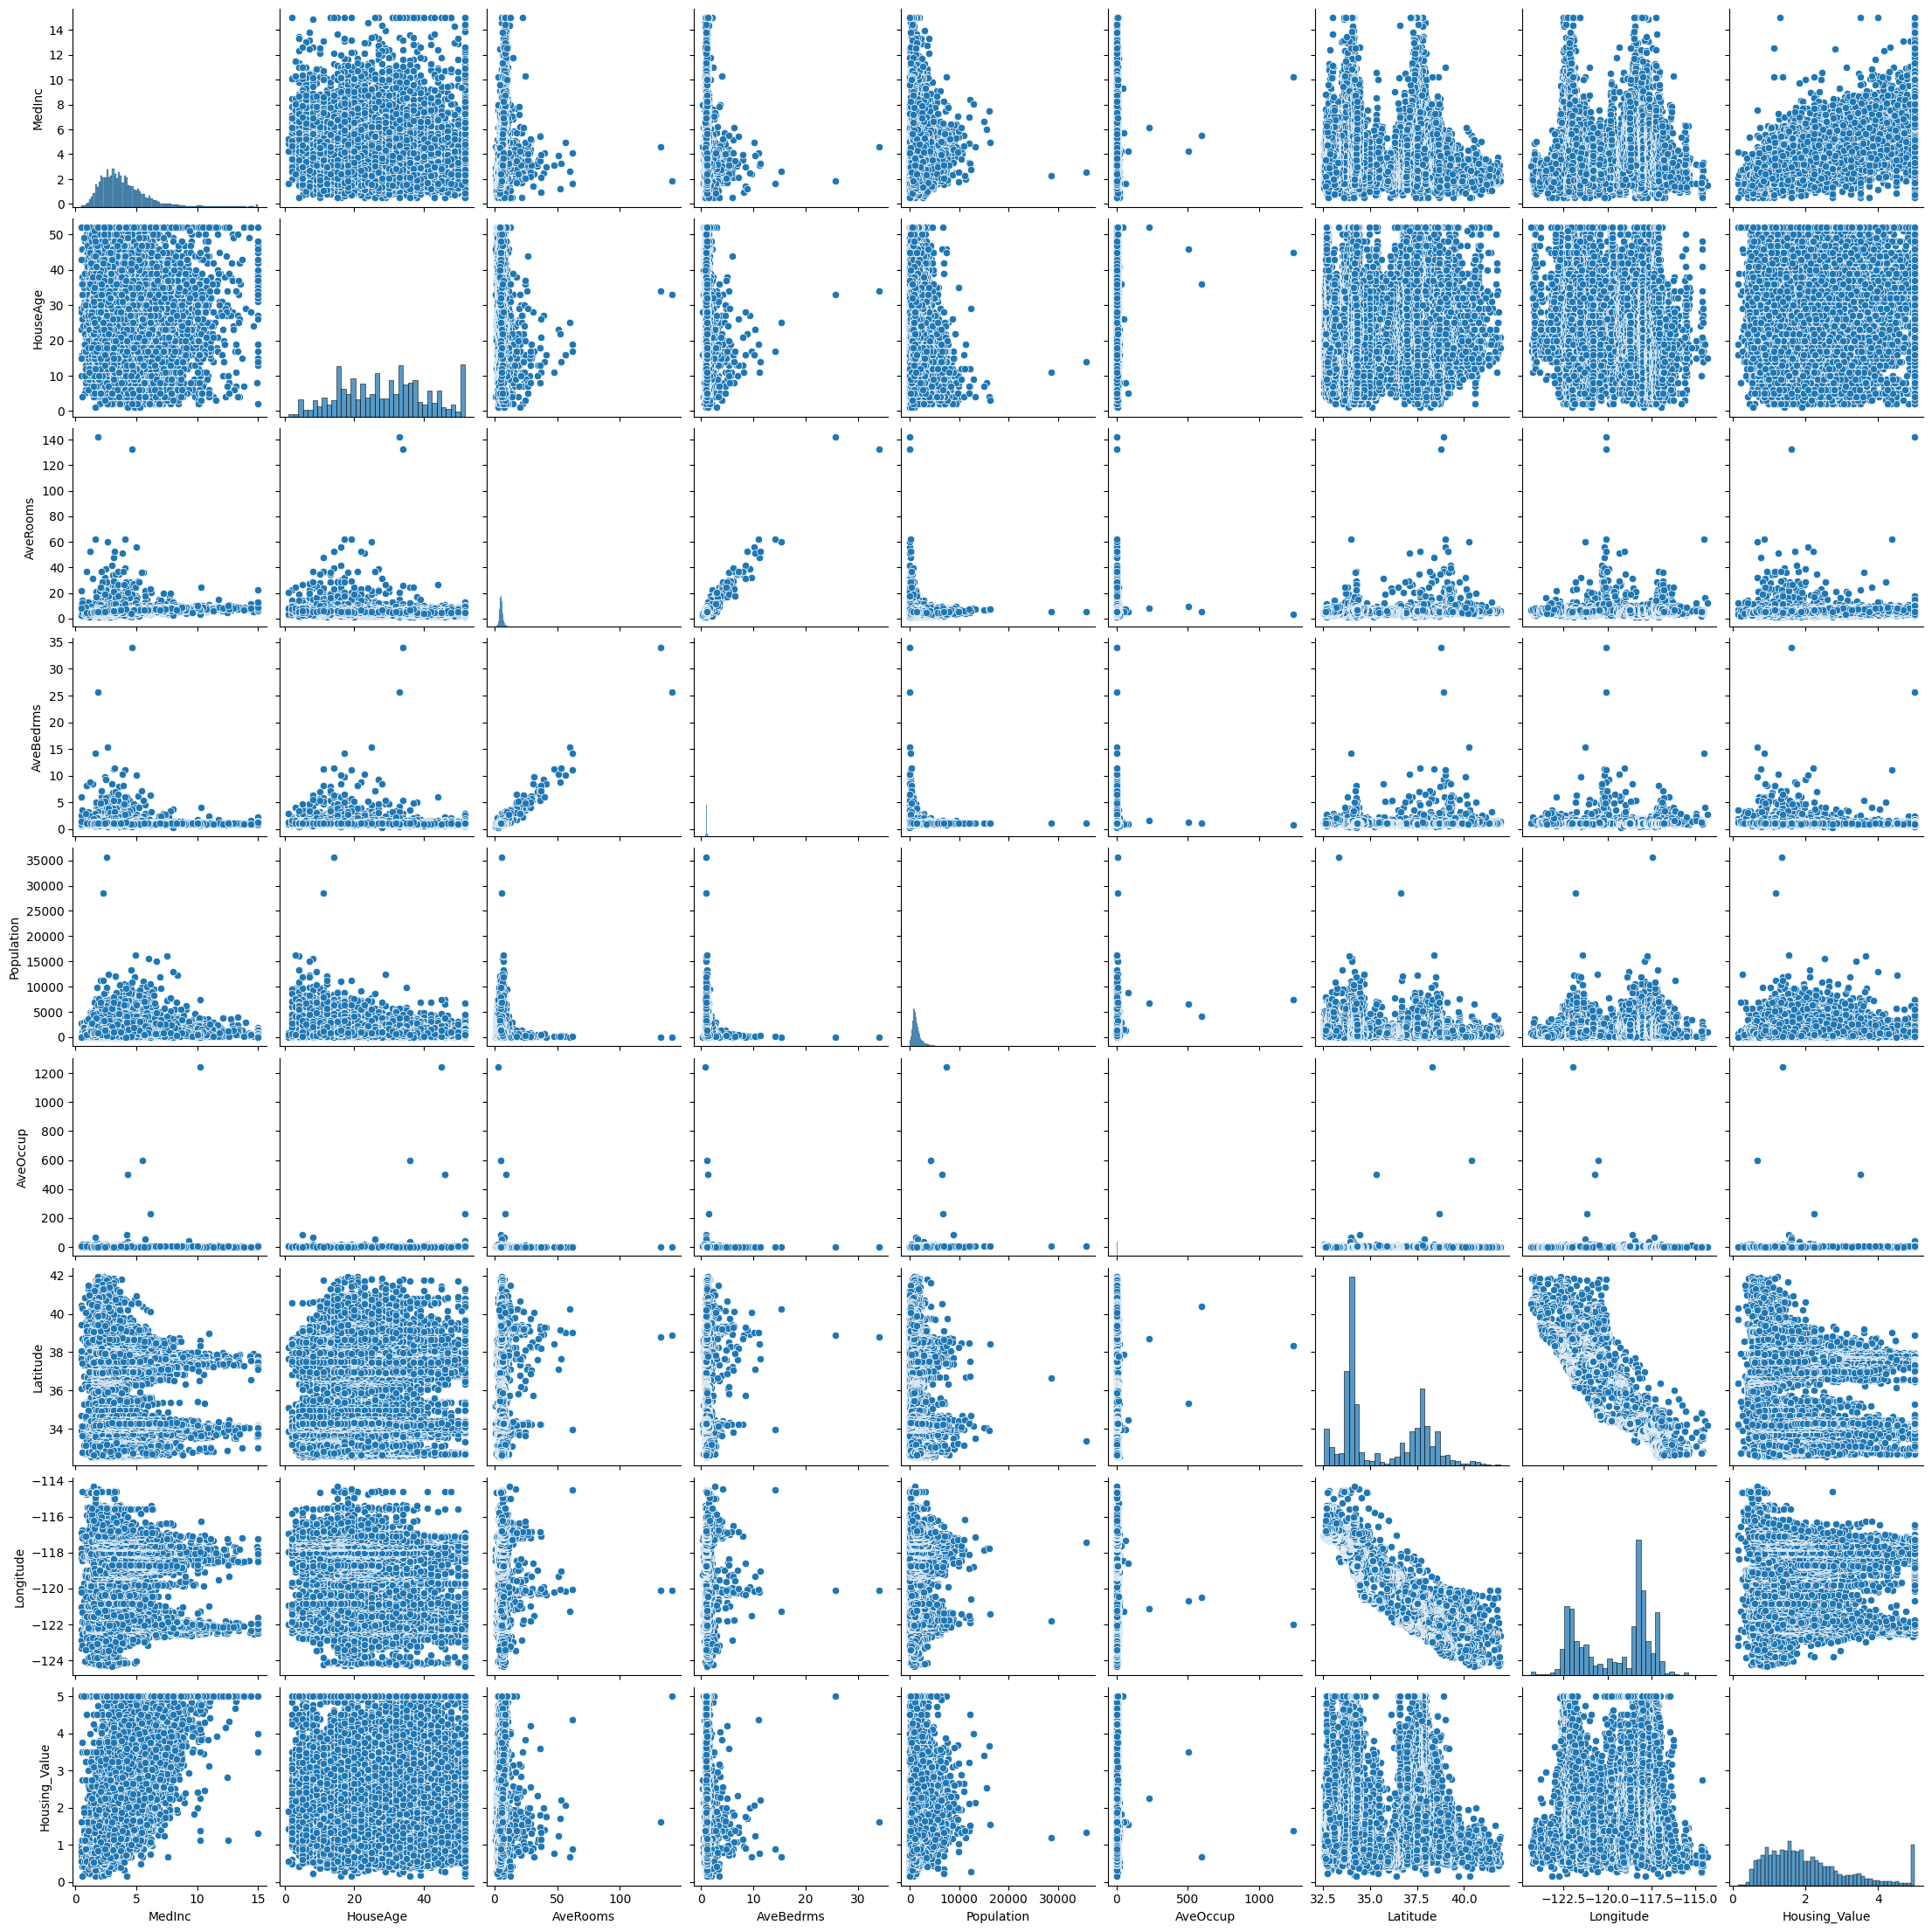

In [30]:
#Pair Plot : Plots multiple pairwise bivariate distributions in a dataset
sns.pairplot(data)

**Data Preparation**

In [33]:
#Create new features: bedrooms per room
data['bedrooms per room'] = data['AveBedrms'] / data['AveRooms']

In [35]:
#Identify the features, target from the given set of attributes
feature_variable =['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
target_variable=data['Housing_Value']

features = data.drop('Housing_Value', axis = 1)

Split the data (features, target) into train, test using train_test_split()



In [37]:
# Split data into train and test (80:20)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target_variable,train_size=0.8,random_state=1)

In [39]:
print(len(xtrain))
print(xtrain.shape)
print(ytrain.shape)
print(len(xtest))

16512
(16512, 9)
(16512,)
4128


In [41]:
#Lets check what does xtrain contain:
xtrain

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,bedrooms per room
15961,3.1908,52.0,5.000000,1.014184,879.0,3.117021,37.71,-122.43,0.202837
1771,3.6094,42.0,4.900990,0.957096,971.0,3.204620,37.95,-122.35,0.195286
16414,2.6250,16.0,8.333333,1.666667,20.0,3.333333,37.90,-121.24,0.200000
5056,1.5143,34.0,3.805981,1.149526,3538.0,2.580598,34.02,-118.35,0.302031
8589,7.3356,38.0,5.894904,1.057325,750.0,2.388535,33.89,-118.39,0.179363
...,...,...,...,...,...,...,...,...,...
10955,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88,0.268100
17289,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63,0.149008
5192,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26,0.205862
12172,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16,0.190676


In [43]:
#Lets check the length of ytrain & ytest data respectively
print(len(ytrain))
print(len(ytest))

16512
4128


**Standard Scaling**


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s_data_transform=pd.DataFrame(scaler.fit_transform(data))
s_data_transform
data_transform=scaler.fit_transform(data)
data_transform

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -1.32783522,
         2.12963148, -1.1458328 ],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -1.32284391,
         1.31415614, -0.98717456],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -1.33282653,
         1.25869341, -1.44011541],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.8237132 ,
        -0.99274649,  0.03616742],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.87362627,
        -1.05860847,  0.11750623],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.83369581,
        -1.01787803,  0.1397813 ]])

In [46]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(xtrain, ytrain)

LinearRegression()

**Find the best fit line using :**
Gradient descent &
Stochastic gradient descent

Formula of MSE(Mean Squared Error):
$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2 \quad \textrm{where} \quad \hat{y_i} = mx_i + b $$

Partial Derivative:

$$𝑓(𝑚,𝑏)= \frac{1}{n}\sum_{i=1}^{n}(y_i - (mx_i+b))^2$$

PD wrt m:

$$ [f(g(x))]' = f'(g(x)) * g(x)' \: - \textrm{chain rule}$$

PD wrt b:
$$\frac{\partial f}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}-2(y_i - (mx_i+b))$$


# **Lets Start with Gradient Descent:**

In [48]:
#  YOUR CODE HERE
print(xtrain.shape[1])
print("----------------------------------------------------------------")
print(xtrain.shape[0])
print("----------------------------------------------------------------")
weight=np.random.randn(xtrain.shape[1])
intercept=0
learning_rate = 0.001
print(weight)
print("----------------------------------------------------------------")
print(weight.shape)

9
----------------------------------------------------------------
16512
----------------------------------------------------------------
[ 1.00356362  1.59134568  0.31841391 -0.195731   -0.05728732 -0.25443513
  0.30838317 -0.9219053   0.35059661]
----------------------------------------------------------------
(9,)


In [49]:
# y=mx+c
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)

In [50]:
#MSE - Mean Squared Error
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

In [51]:
#Derivative of loss function with weights
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

In [52]:
# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

In [53]:
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 1000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.01

    for i in range(epoch):


        y_predicted = predicted_y(weight_vector,x,intercept)

        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted)


        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))

    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")

    return weight_vector,intercept


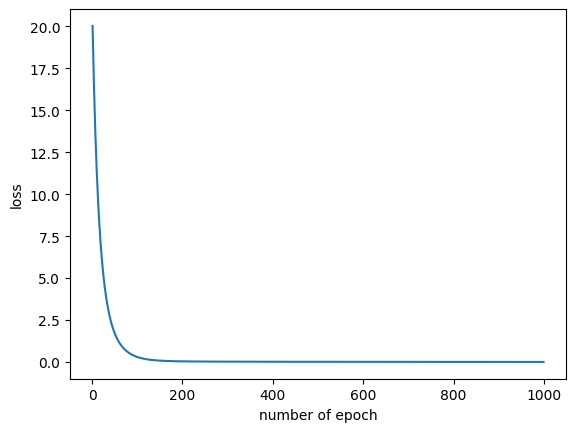

In [54]:
w,b=gradient_descent(data_transform,target_variable)

In [56]:
print("Weights:",w)
print("")
print("bias: ",b)

Weights: [-1.55118225e-02 -9.75549090e-03  1.61926227e-01 -1.30734895e-01
 -5.31619662e-03  4.06666546e-04 -1.94837799e-01 -1.90174736e-01
  1.10827879e+00  5.24944176e-02]

bias:  2.0685581656078282


# **Now lets try Stocastic Gradient Descent:**

In [61]:
# YOUR CODE(s) HERE
# SGD
def sgd(X, y, learning_rate=0.2, n_epochs=1000, k=40):

    w = np.random.randn(1,10)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value

    epoch=1

    while epoch <= n_epochs:

        temp = X.sample(k)

        X_tr = temp.iloc[:,0:10].values
        y_tr = temp.iloc[:,-1].values

        Lw = w
        Lb = b

        loss = 0
        y_pred = []
        sq_loss = []

        for i in range(k):

            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)

            w = w - learning_rate * Lw
            b = b - learning_rate * Lb

            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)

        loss = mean_squared_error(y_pred, y_tr)

        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        #learning_rate = learning_rate/1.02


    return w,b

In [62]:
w,b=sgd(s_data_transform,target_variable)

Epoch: 1, Loss: 5.474
Epoch: 2, Loss: 1.882
Epoch: 3, Loss: 0.765
Epoch: 4, Loss: 0.767
Epoch: 5, Loss: 0.343
Epoch: 6, Loss: 0.247
Epoch: 7, Loss: 0.202
Epoch: 8, Loss: 0.316
Epoch: 9, Loss: 0.226
Epoch: 10, Loss: 0.196
Epoch: 11, Loss: 0.449
Epoch: 12, Loss: 0.176
Epoch: 13, Loss: 0.400
Epoch: 14, Loss: 0.069
Epoch: 15, Loss: 0.098
Epoch: 16, Loss: 0.106
Epoch: 17, Loss: 0.062
Epoch: 18, Loss: 0.100
Epoch: 19, Loss: 0.096
Epoch: 20, Loss: 0.069
Epoch: 21, Loss: 0.078
Epoch: 22, Loss: 0.056
Epoch: 23, Loss: 0.068
Epoch: 24, Loss: 0.053
Epoch: 25, Loss: 0.118
Epoch: 26, Loss: 0.050
Epoch: 27, Loss: 0.027
Epoch: 28, Loss: 0.024
Epoch: 29, Loss: 0.021
Epoch: 30, Loss: 0.034
Epoch: 31, Loss: 0.032
Epoch: 32, Loss: 0.036
Epoch: 33, Loss: 0.020
Epoch: 34, Loss: 0.027
Epoch: 35, Loss: 0.021
Epoch: 36, Loss: 0.023
Epoch: 37, Loss: 0.031
Epoch: 38, Loss: 0.018
Epoch: 39, Loss: 0.018
Epoch: 40, Loss: 0.040
Epoch: 41, Loss: 9.704
Epoch: 42, Loss: 0.153
Epoch: 43, Loss: 0.161
Epoch: 44, Loss: 265

In [64]:
print("Weights:",w)
print("")
print("bias: ",b)

Weights: [[-9.69705037e+00  1.17553789e+02  3.98779011e+03 -4.15898984e+03
   8.35378852e+02 -6.75703209e+04 -3.03896703e+03 -1.96750001e+03
  -2.30230381e+03  1.31607956e+03]]

bias:  [[-1267.69998202]]


Thanks